In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

<Figure size 640x480 with 0 Axes>

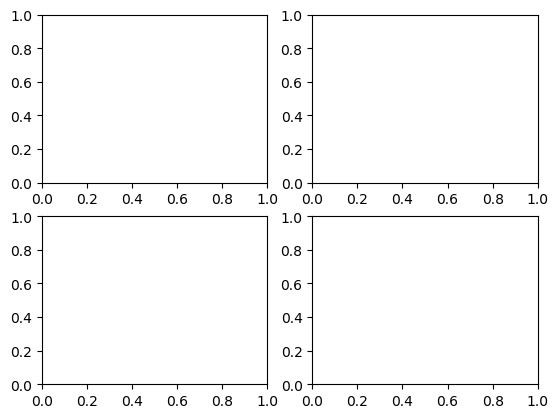

In [40]:
plt.rcParams.update(plt.rcParamsDefault) # Reset the plot if already created or config changed

fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes


## Horizontal Bar Plot :- 

##### Axes.barh(self, y, width, height=0.8, left=None, *, align='center', **kwargs)

Make a horizontal bar plot.

The bars are positioned at y with the given alignment. Their dimensions are given by width and height. The horizontal baseline is left (default 0).

Each of y, width, height, and left may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.



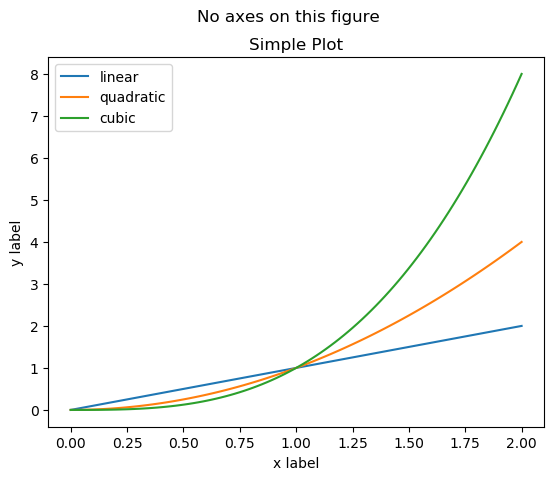

In [14]:
plt.rcParams.update(plt.rcParamsDefault) # Reset the plot if already created or config changed # Clear the plot if already created
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

#fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

plt.xlabel('x label') #X label
plt.ylabel('y label') # Y label

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

In [12]:
# data creation
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

In [27]:
# Available styles
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


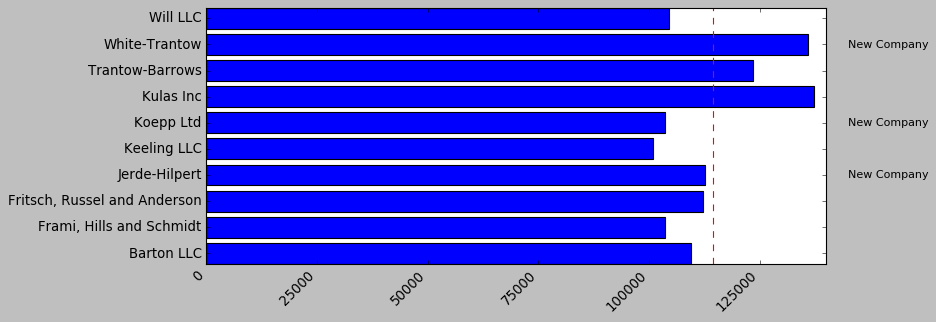

In [42]:
plt.rcParams.update({'figure.autolayout': True}) # Change the default theme/layout
plt.style.use(plt.style.available[1]) # change the style
fig, ax = plt.subplots(figsize=(10, 4)) # increse the dfault size of graph figure

# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
ax.barh(group_names, group_data) # barh(y, width)

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")
    
labels = ax.get_xticklabels() # We can gain access to these labels with the axes.Axes.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right') # rotate the labels of x axis
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

In [ ]:
# The suppported file formats
print(fig.canvas.get_supported_filetypes())

In [ ]:
# For saving the graph
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [23]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

(<Figure size 920x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3a303e8448>)

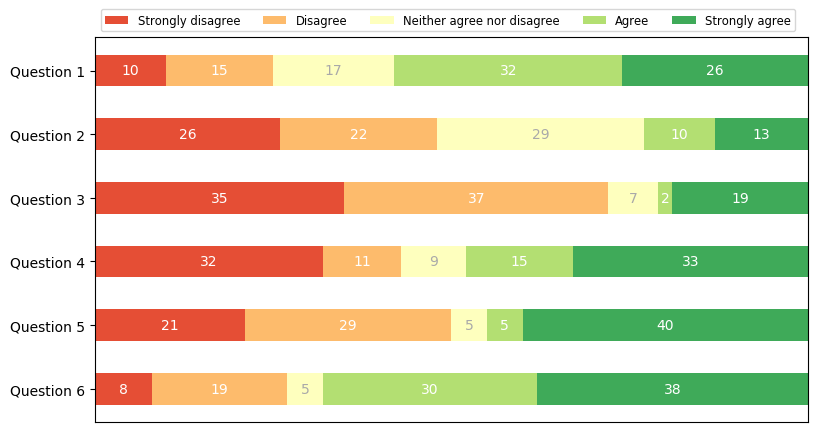

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

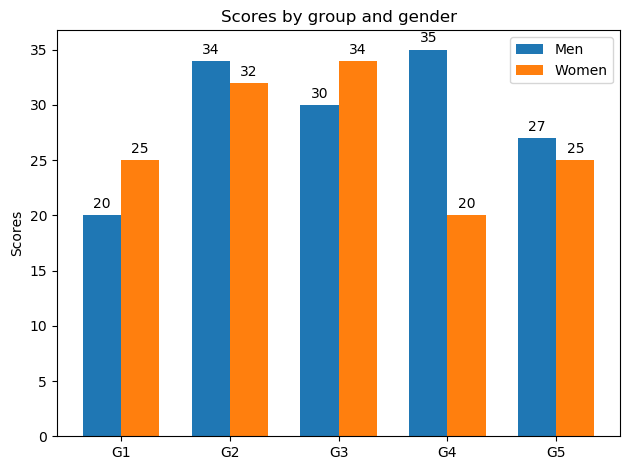

In [36]:
plt.rcParams.update(plt.rcParamsDefault)

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations (array([0, 1, 2, 3, 4]))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

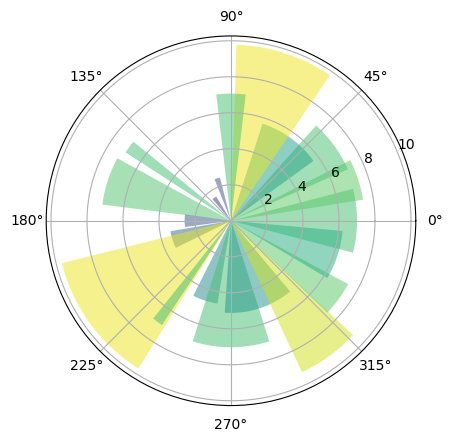

In [45]:
plt.rcParams.update(plt.rcParamsDefault)

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()
